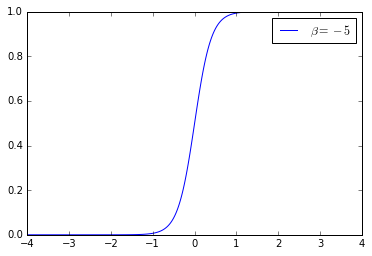

 [-----------------100%-----------------] 20000 of 20000 complete in 2.4 sec-5.00000929184
6.66805521982e-06
Plotting beta
Plotting sig


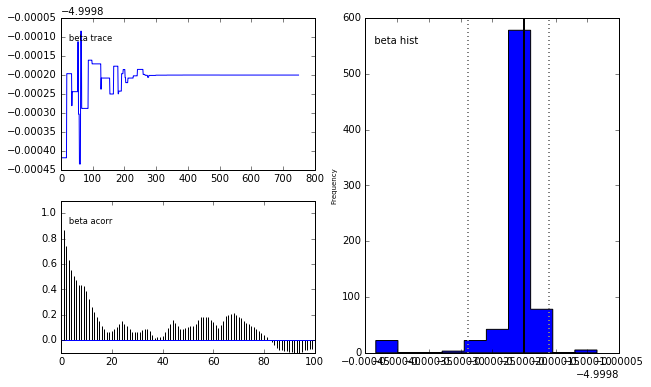

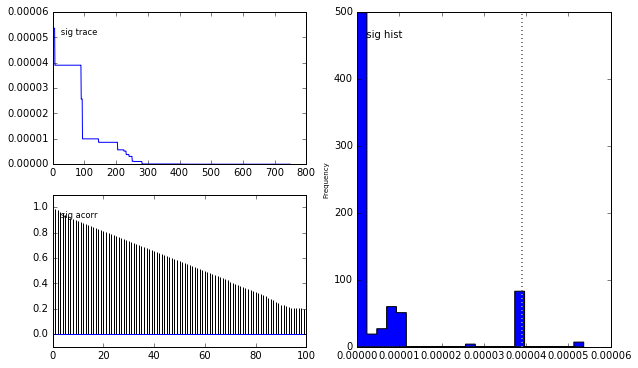

In [4]:
import pymc as pm
from matplotlib import pyplot as plt
import numpy as np
from pymc.Matplot import plot as mcplot


#data generation
def logistic(x, beta):
    return 1.0 / (1.0 + np.exp(beta * x))

#hidden
beta = -5

x = np.linspace(-4, 4, 600)
data = logistic(x, -5)

plt.plot(x,data , label=r"$\beta = -5$")
plt.legend();

plt.show()




#Priors
beta = pm.Uniform("beta", -10, 10, value=1.)
sig = pm.Uniform("sig", 0.0, 100.0, value=1.)


# @pm.deterministic
# def logistic(x=data, beta=beta):
#     return 1.0 / (1. + np.exp(beta * x))
@pm.deterministic
def logistic(x=x, beta=beta):
    return 1.0 / (1. + np.exp(beta * x))

#likelihood
y = pm.Normal("obs", mu=logistic, tau=1.0/sig**2, value=data, observed=True)


model = pm.Model([y, data,beta,sig])
mcmc = pm.MCMC(model) 
mcmc.sample(20000, 5000, thin=20)


beta_samples = mcmc.trace('beta')[:]
sig_samples = mcmc.trace('sig')[:]

print(beta_samples.mean())
print(sig_samples.mean())

mcplot(mcmc.trace('beta'))
mcplot(mcmc.trace('sig'))
plt.show()